#***DATA SCIENCE PROJECT***
### Kunal Srivatava, Lauryn Nakamitsu, Andrew Mortazavi
### Google Apprenticeship Data Science Final Project

### We aim to analyze and break down the data to gain meaningful observations from statistics

### **DATA:** 
###1. Public tweets that include #covid19
#####       https://www.kaggle.com/gpreda/covid19-tweets
###       2. ISO country codes (for the last part of the project)
#####       https://www.kaggle.com/andradaolteanu/iso-country-codes-global

In [ ]:
# imports
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/data/tweets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/data/tweets


In [ ]:
# load data
tweets_df = pd.read_csv("covid19_tweets.csv")

In [ ]:
# get shape of the data
print(f"data shape: {tweets_df.shape}")

data shape: (82710, 13)


In [ ]:
# get features of the data
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82710 entries, 0 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         82710 non-null  object
 1   user_location     65995 non-null  object
 2   user_description  78005 non-null  object
 3   user_created      82710 non-null  object
 4   user_followers    82710 non-null  int64 
 5   user_friends      82710 non-null  int64 
 6   user_favourites   82710 non-null  int64 
 7   user_verified     82710 non-null  bool  
 8   date              82710 non-null  object
 9   text              82710 non-null  object
 10  hashtags          58903 non-null  object
 11  source            82693 non-null  object
 12  is_retweet        82710 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 7.1+ MB


In [ ]:
# data description
tweets_df.describe()

,user_followers,user_friends,user_favourites
count,8.271000e+04,82710.000000,8.271000e+04
mean,1.038851e+05,2172.423226,1.506148e+04
std,8.112205e+05,9692.216847,4.615382e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.700000e+02,158.000000,2.230000e+02
50%,9.860000e+02,565.000000,1.896000e+03
75%,5.257000e+03,1784.000000,9.947750e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [ ]:
# what does untouched data look like
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
# missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
# show missing data
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,16715,4705,0,0,0,0,0,0,0,23807,17,0
Percent,0,20.2092,5.68855,0,0,0,0,0,0,0,28.7837,0.0205537,0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


In [ ]:
# unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
# show unique values
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,82710,65995,78005,82710,82710,82710,82710,82710,82710,82710,58903,82693,82710
Uniques,49686,15863,47397,50456,16939,8048,22502,2,61407,82576,25833,476,1


In [ ]:
# find most frequent values
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
# show frequent values
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,82710,65995,78005,82710,82710,82710,82710,82710,82710,82710,58903,82693,82710
Most frequent item,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,0,0,0,False,2020-07-29 16:30:00,This is Trump's Pandemic. #MAGA2020 #COVID19,['COVID19'],Twitter Web App,False
Frequence,323,1583,323,323,749,1256,2219,72162,26,6,17938,25997,82710
Percent from total,0.391,2.399,0.414,0.391,0.906,1.519,2.683,87.247,0.031,0.007,30.453,31.438,100


In [ ]:
# VISUALIZATION METHOD
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

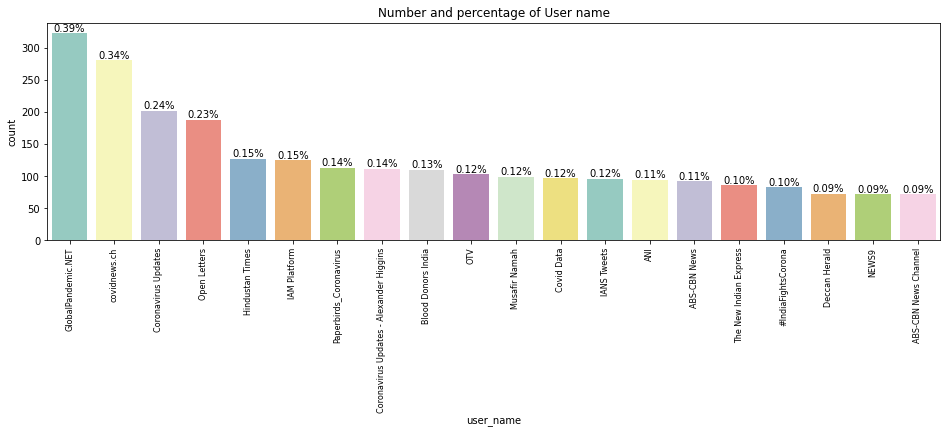

In [ ]:
# usernames related to trending covid-19 topics
plot_count("user_name", "User name", tweets_df,4)

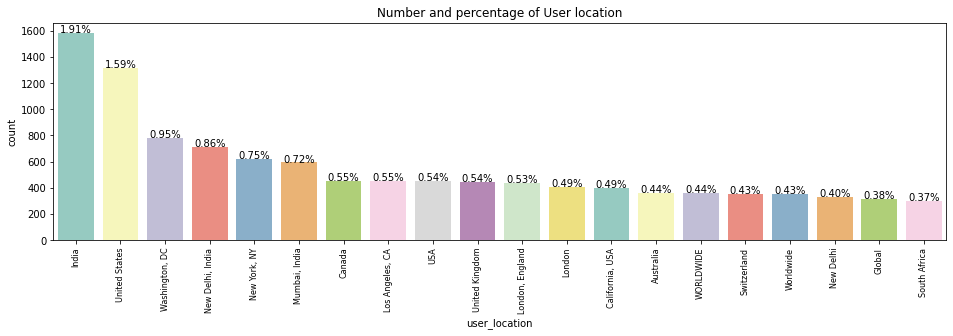

In [ ]:
# user location in high-risk areas
plot_count("user_location", "User location", tweets_df,4)

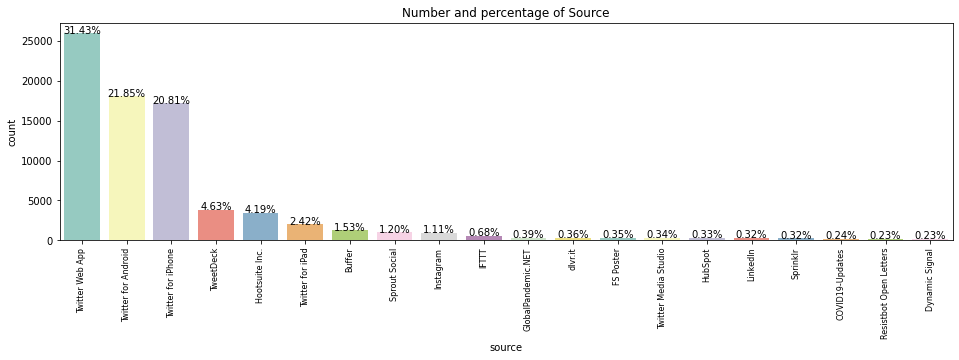

In [ ]:
# What are the sources of these tweets?
plot_count("source", "Source", tweets_df,4)

In [ ]:
# WORDCLOUD SETUP
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

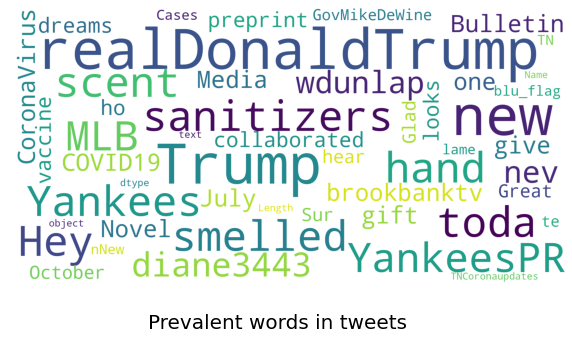

In [ ]:
# PREVALENT WORDS IN ALL OF TWITTER
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

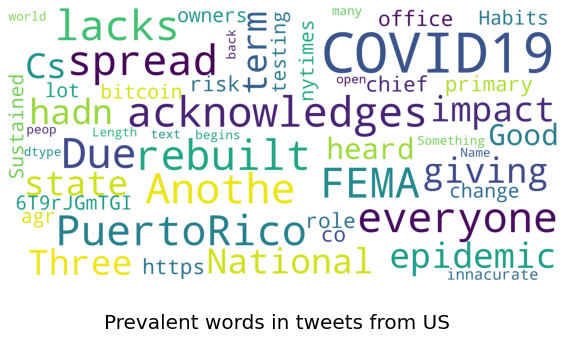

In [ ]:
# PREVALENT WORDS ACROSS THE US
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

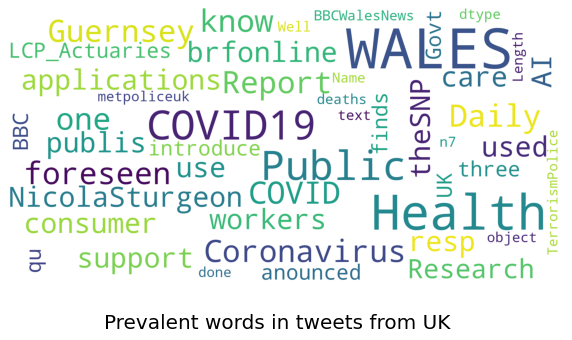

In [ ]:
# PREVALENT WORDS ACROSS THE UK
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

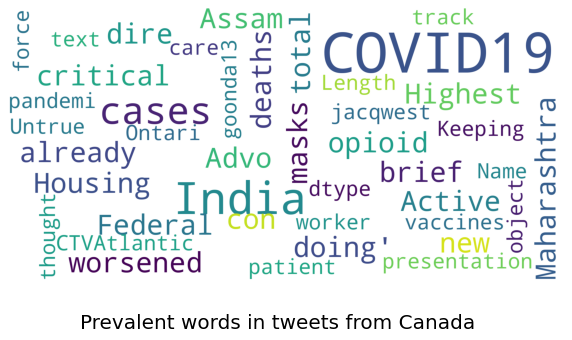

In [ ]:
# PREVALENT WORDS ACROSS CANADA
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

In [ ]:
# HASHTAG ANALYSIS
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


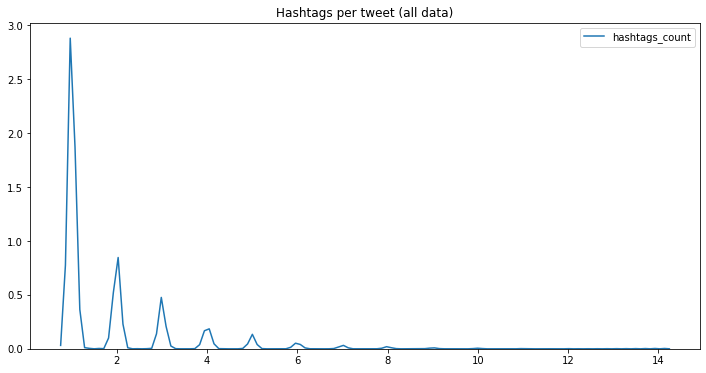

In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [ ]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 32558


In [ ]:
# COUNTRY ANALYSIS
country_df = pd.read_csv("wikipedia-iso-country-codes.csv")

In [ ]:
# what does this data look like
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

,country,alpha2,alpha3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [ ]:
# merge the countries dataset with the tweets dataset
tweets_df['country'] = tweets_df['user_location']
tweets_df = tweets_df.merge(country_df, on="country")

In [ ]:
# what does this data look like
tweets_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_count,hashtags_individual,country,alpha2,alpha3,numeric,iso
0,Ms Paz,United States,NaN,2019-09-15 18:10:09,127,974,30217,False,2020-07-25 12:26:21,#FEMA acknowledges #PuertoRico lacks rebuilt h...,"['FEMA', 'PuertoRico', 'COVID19']",Twitter for iPhone,False,3,"[['FEMA', 'PuertoRico', 'COVID19']]",United States,US,USA,840,ISO 3166-2:US
1,Resist2020,United States,#blacklivesmatter #notmypresident #lovetrumpsh...,2010-07-18 20:57:33,89,245,12529,False,2020-07-25 12:22:55,How about everyone can spread #COVID19. Anothe...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
2,RebeccaCorn,United States,BINARY OPTIONS EXPERT🏅\nFINANCIAL EXPERT AND M...,2020-04-10 10:57:37,35,58,28,False,2020-07-25 12:22:20,Due to the epidemic I'm giving $80 - $1000 to ...,['None'],Twitter for Android,False,1,[['None']],United States,US,USA,840,ISO 3166-2:US
3,OrianaBeaudet DNP RN,United States,VP of Nursing Innovation @ANANursingWorld» Str...,2016-08-15 03:21:55,514,2277,1772,False,2020-07-25 12:20:24,National and state impact of #COVID19 on our e...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
4,Terry 😷,United States,*BUILD BACK BETTER*,2009-03-21 16:18:08,110,449,2533,False,2020-07-25 12:19:30,Three Cs is a term I hadn’t heard before. Good...,"['GoodAdvice', 'COVID19']",Twitter Web App,False,2,"[['GoodAdvice', 'COVID19']]",United States,US,USA,840,ISO 3166-2:US


In [ ]:
# use plotly to visualize data across the world 

tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [ ]:
# plot result
plot_map(tw_add_df, "Tweets per country (where country is specified)")